# So sánh các mô hình 

In [106]:
import os 
import sys
project_root = os.path.abspath(os.path.join(os.getcwd(),".."))
if project_root not in sys.path:
    sys.path.append(project_root)
import pandas as pd
from src.preprocessor_utils import split_data, trans_data
import joblib
from src.eval_metric import Metric
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import (
    precision_score, recall_score, f1_score, roc_auc_score,
    average_precision_score
)
from src.preprocessor_utils import get_dataCount,get_datatfidf,get_dataword2vec
import shap
from sklearn.utils import resample
import scipy.sparse
import seaborn as sns


In [116]:


def shapBeewarm(model, x_test):
    # 1. Tạo Explainer (TreeExplainer chuyên trị cho XGBoost/RandomForest)
    explainer = shap.TreeExplainer(model)
    
    # 2. Tính toán SHAP values (Chỉ tính 1 lần duy nhất)
    # Trả về object Explanation chứa đầy đủ thông tin (values, data, base_values)
    shap_values_obj = explainer(x_test)
    
    # 3. Xử lý trường hợp Phân loại nhị phân (Binary Classification)
    # Một số model trả về shape (số mẫu, số feature, 2 lớp). Ta cần chọn lớp 1 (Positive).
    if len(shap_values_obj.shape) == 3:
        shap_values_to_plot = shap_values_obj[:, :, 1]
    else:
        # Nếu là Regression hoặc XGBoost (thường trả về output đơn), giữ nguyên
        shap_values_to_plot = shap_values_obj
        
    # 4. Vẽ biểu đồ Beeswarm
    plt.figure() # Tạo khung hình mới
    shap.plots.beeswarm(shap_values_to_plot, show=False)
    
    # Tùy chỉnh thêm (nếu cần) và hiển thị
    plt.title("Mức độ ảnh hưởng của các đặc trưng (SHAP Beeswarm)", fontsize=14)
    plt.show()

In [67]:

def shapBeewarm(model,x_test):
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(x_test)
    shap_values_obj = explainer(x_test)
    shap.summary_plot(shap_values, x_test)

In [68]:
print(project_root)

d:\PYTHON\data_mining\fraud-detection-post


In [69]:
path_test = os.path.join(project_root,"data","data_test.csv")
df = pd.read_csv(path_test)
x_test, y_test = split_data(df)

In [70]:
x_testc =  trans_data(x_test,"count")
x_testf = trans_data(x_test,"tfidf")
x_test2v = trans_data(x_test,"word2vec")

d:\PYTHON\data_mining\fraud-detection-post\src\feature_engineering.py:19: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  X['key_note'] = temp_text.str.contains(pattern, case=False, na=False).astype(int)
d:\PYTHON\data_mining\fraud-detection-post\src\feature_engineering.py:19: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  X['key_note'] = temp_text.str.contains(pattern, case=False, na=False).astype(int)
d:\PYTHON\data_mining\fraud-detection-post\src\feature_engineering.py:19: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  X['key_note'] = temp_text.str.contains(pattern, case=False, na=False).astype(int)
d:\anaconda\envs\tf_env\Lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call

In [118]:
model_lr1 = joblib.load(r"D:\PYTHON\data_mining\fraud-detection-post\models\model_lr_count.pkl")
model_lr2 = joblib.load(r"D:\PYTHON\data_mining\fraud-detection-post\models\models_lr.pkl")
model_xgb1 = joblib.load(r"D:\PYTHON\data_mining\fraud-detection-post\models\model_xgb_tf_tuneg.pkl")
model_xgb2 = joblib.load(r'D:\PYTHON\data_mining\fraud-detection-post\models\model_xgb_tunec_03.pkl')
model_xgb3 = joblib.load(r"D:\PYTHON\data_mining\fraud-detection-post\models\model_xgb_w2v_tuneg.pkl")
model_nb = joblib.load(r"D:\PYTHON\data_mining\fraud-detection-post\models\model_nb_tunef_05.pkl")
model_rf1 = joblib.load(r"D:\PYTHON\data_mining\fraud-detection-post\models\rf_gcv_model_tuned_countdata.pkl") 
model_rf2 = joblib.load(r"D:\PYTHON\data_mining\fraud-detection-post\models\rf_gcv_model_tuned_tfidf.pkl")
model_rf3 = joblib.load(r"D:\PYTHON\data_mining\fraud-detection-post\models\rf_gcv_model_tuned_w2v.pkl")

In [87]:
x_trainc,y_trainc = get_dataCount()
x_trainf,y_trainf = get_datatfidf()
x_trainw2v,y_trainw2v = get_dataword2vec()

Mô hình logistic regression 

--- ĐÁNH GIÁ: LR (Threshold=0.5) ---
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3403
           1       0.87      0.80      0.83       173

    accuracy                           0.98      3576
   macro avg       0.93      0.90      0.91      3576
weighted avg       0.98      0.98      0.98      3576

ROC-AUC: 0.9840
PR-AUC (AUPRC): 0.8926 (Quan trọng cho Fraud)


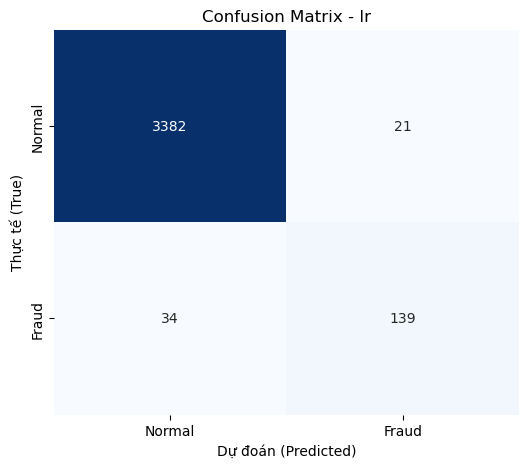

In [88]:
# countVec 
eval_lr1 = Metric(model_lr1,x_testc,y_test)
eval_lr1.evaluate_model("lr")


--- ĐÁNH GIÁ: LR (Threshold=0.5) ---
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3403
           1       0.67      0.90      0.77       173

    accuracy                           0.97      3576
   macro avg       0.83      0.94      0.88      3576
weighted avg       0.98      0.97      0.98      3576

ROC-AUC: 0.9900
PR-AUC (AUPRC): 0.9086 (Quan trọng cho Fraud)


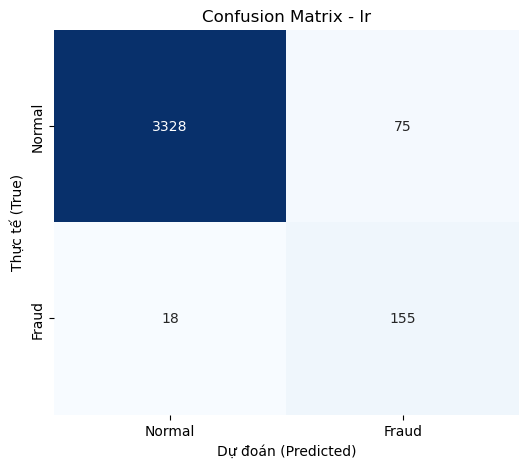

In [90]:
# tfidf 
eval_lr2 = Metric(model_lr2,x_testf,y_test)
eval_lr2.evaluate_model("lr")

Mô hình XGBoost

--- ĐÁNH GIÁ: XGB (Threshold=0.2) ---
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3403
           1       0.88      0.82      0.84       173

    accuracy                           0.99      3576
   macro avg       0.93      0.90      0.92      3576
weighted avg       0.99      0.99      0.99      3576

ROC-AUC: 0.9922
PR-AUC (AUPRC): 0.9263 (Quan trọng cho Fraud)


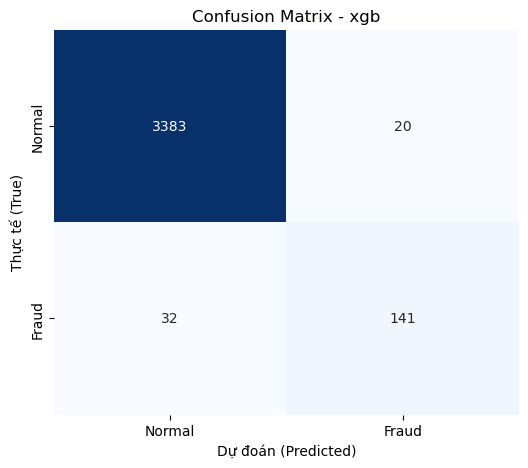

In [109]:
# tfidf 
eval_xgb1 = Metric(model_xgb1,x_testf,y_test)
eval_xgb1.evaluate_model("xgb",0.2)

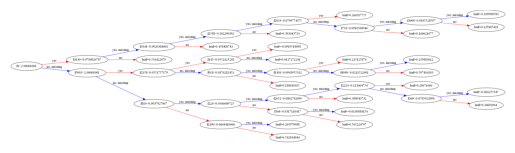

In [120]:
import xgboost as xgb 

xgb.plot_tree(model_xgb1, num_trees=0, rankdir='LR') 

plt.show()

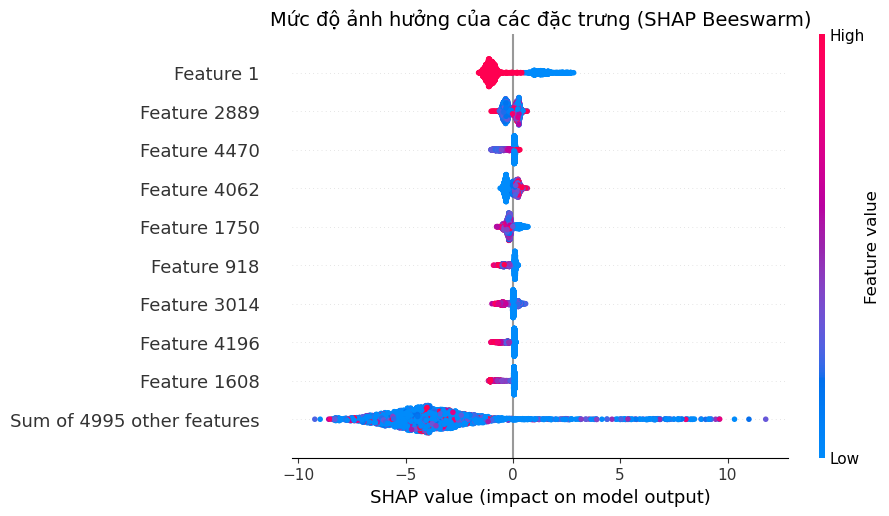

In [115]:
shapBeewarm(model_xgb1,x_testf)

--- ĐÁNH GIÁ: XGB (Threshold=0.5) ---
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3403
           1       0.90      0.72      0.80       173

    accuracy                           0.98      3576
   macro avg       0.94      0.86      0.89      3576
weighted avg       0.98      0.98      0.98      3576

ROC-AUC: 0.9756
PR-AUC (AUPRC): 0.8662 (Quan trọng cho Fraud)


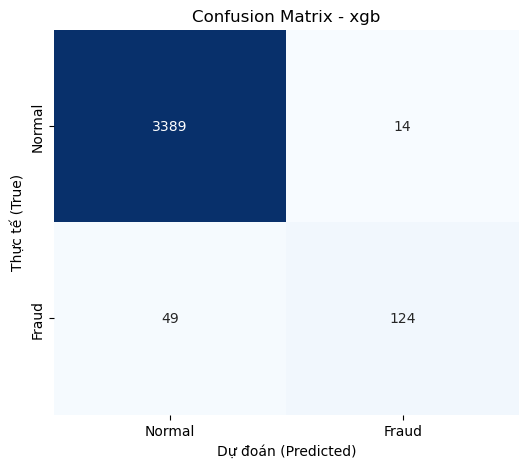

In [119]:
# word2vec
eval_xgb3 = Metric(model_xgb3,x_test2v,y_test)
eval_xgb3.evaluate_model("xgb")

--- ĐÁNH GIÁ: XGB (Threshold=0.5) ---
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3403
           1       0.91      0.85      0.88       173

    accuracy                           0.99      3576
   macro avg       0.95      0.92      0.94      3576
weighted avg       0.99      0.99      0.99      3576

ROC-AUC: 0.9928
PR-AUC (AUPRC): 0.9446 (Quan trọng cho Fraud)


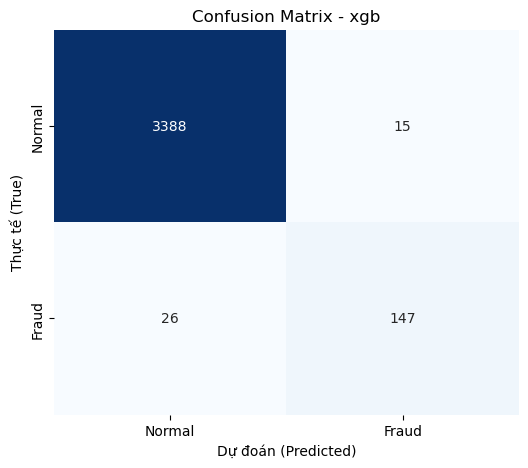

In [94]:
# count
eval_xgb2 = Metric(model_xgb2,x_testc,y_test)
eval_xgb2.evaluate_model("xgb")

Mô hình naive bayes 

--- ĐÁNH GIÁ: NB (Threshold=0.5) ---
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3403
           1       0.92      0.57      0.70       173

    accuracy                           0.98      3576
   macro avg       0.95      0.78      0.84      3576
weighted avg       0.98      0.98      0.97      3576

ROC-AUC: 0.9774
PR-AUC (AUPRC): 0.8152 (Quan trọng cho Fraud)


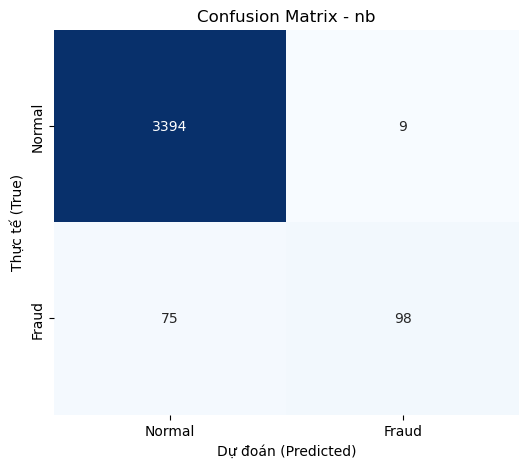

In [96]:
# tfidf 
eval_nb = Metric(model_nb,x_testf,y_test)
eval_nb.evaluate_model("nb")

Mô hình RandomForest

--- ĐÁNH GIÁ: RF (Threshold=0.5) ---
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3403
           1       1.00      0.53      0.69       173

    accuracy                           0.98      3576
   macro avg       0.99      0.77      0.84      3576
weighted avg       0.98      0.98      0.97      3576

ROC-AUC: 0.9944
PR-AUC (AUPRC): 0.9522 (Quan trọng cho Fraud)


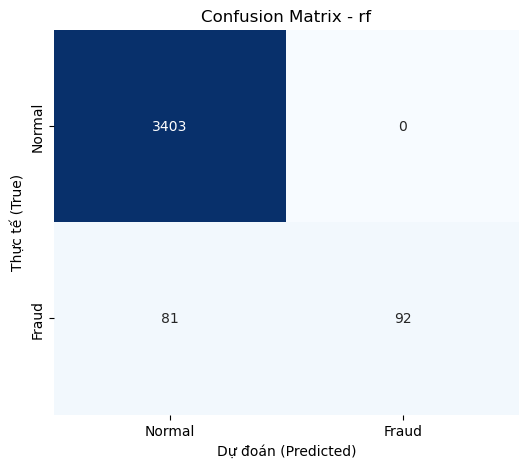

In [101]:
# countVec
eval_rf1 = Metric(model_rf1,x_testc,y_test)
eval_rf1.evaluate_model("rf")

--- ĐÁNH GIÁ: RF (Threshold=0.5) ---
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3403
           1       1.00      0.49      0.65       173

    accuracy                           0.98      3576
   macro avg       0.99      0.74      0.82      3576
weighted avg       0.98      0.98      0.97      3576

ROC-AUC: 0.9940
PR-AUC (AUPRC): 0.9424 (Quan trọng cho Fraud)


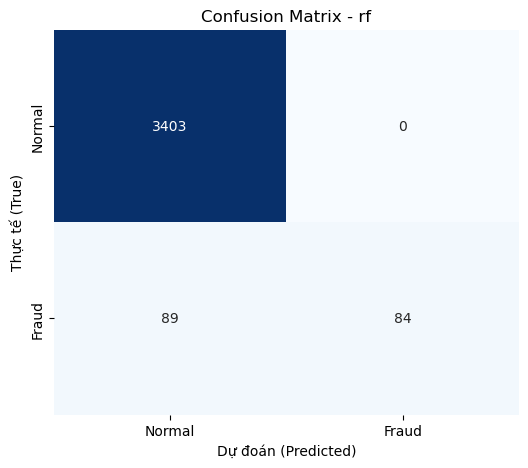

In [104]:
# TFIDF
eval_rf2 = Metric(model_rf2,x_testf,y_test)
eval_rf2.evaluate_model("rf")

--- ĐÁNH GIÁ: RF (Threshold=0.5) ---
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3403
           1       0.90      0.70      0.79       173

    accuracy                           0.98      3576
   macro avg       0.94      0.85      0.89      3576
weighted avg       0.98      0.98      0.98      3576

ROC-AUC: 0.9789
PR-AUC (AUPRC): 0.8619 (Quan trọng cho Fraud)


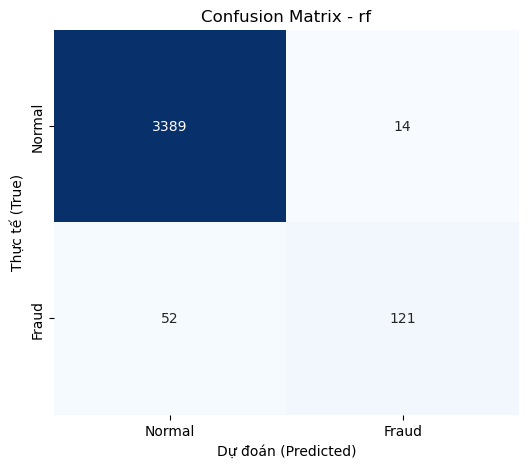

In [103]:
# word2vec
eval_rf3 = Metric(model_rf3,x_test2v,y_test)
eval_rf3.evaluate_model("rf")

Trả lời câu hỏi nghiên cứu 
1.  Thuật toán máy học nào cho hiệu suất cao nhất trong việc phân loại tin tuyển dụng. 

Thuật toán XGBoostclassifical

2. Làm thế nào để cân bằng giữa chỉ số precision và recall 

F1-Score là trung bình điều hòa (harmonic mean) giữa Precision (Độ chính xác) và Recall (Độ phủ/Độ nhạy). Nó được dùng khi bạn muốn tìm điểm cân bằng giữa hai chỉ số này.
$$F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

- Precision (P): Tỉ lệ số điểm thực sự đúng trong số những điểm mô hình dự đoán là đúng.
$$P = \frac{TP}{TP + FP}$$
- Recall (R): Tỉ lệ số điểm mô hình dự đoán đúng trong tổng số điểm thực tế là đúng.
$$R = \frac{TP}{TP + FN}$$

Không giống như F1-Score (được tính tại một ngưỡng threshold cụ thể), PR-AUC là diện tích nằm dưới đường cong Precision-Recall khi ta thay đổi ngưỡng phân loại (threshold) từ 0 đến 1.
$$\text{PR-AUC} = \int_{0}^{1} p(r) \, dr$$

3. Việc áp dụng các kỹ thuật tái lấy mẫu như smote thì liệu có ảnh hưởng như thế nào đến khả năng phát hiện tin giả của mô hình. 

**Hướng 1** 
Ta sẽ smote dữ liệu giả mạo lên cho gần bằng với với dữ liệu không giả mạo -> ta sẽ thêm tớ 16.400 dữ liệu mới tỷ lệ 1:20 

rủi ro: 
+ nếu chọn cách này nghĩa là ta đang ép thuật toán bịa ra rất nhiều dữ liệu ảo từ 1 lượng thông tin rất ít -> mô hình có khả năng cao sẽ học thuộc những dữ liệu ảo đó -> khả năng học vẹt rất cao. 
+ tốc độ và tài nguyên vì 17.880 (dữ liệu thật) và 17.200 (dứ liệu ảo) -> 34.400 dòng dữ liệu.

**Hướng 2**
Ta sẽ kết hợp giũa smote và undersampling: 
ta sẽ smote dữ liệu giả mạo lên 5 lần là tỷ lệ 1:5 và sẽ undersampling dữ liệu không giả mạo xuống gần bằng với dữ liệu giả mạo.

Nhưng đối với mô hình XGBoost thì không bị ảnh hưởng quá lớn vì mô hình này huấn luyện trên những dữ liệu mất cân bằng khá tốt nên việc xử lý smote hay không thì cũng không quá ảnh hưởng và cải thiện dựu đoán mô hình.

4. Những đặc trưng chủ yếu về văn bản hoặc từ khóa (keywords) nào mang tính phân biệt cao nhất giúp nhận diện một tin tuyển dụng giả mạo. 

`petroleum, oil gas,oil energy,data entry,typing,clerical,work home,training provided, encouraged, administrative assitantm clerk` 
-> xem trong analysis.ipynb

5. Phương pháp trích xuất đặc trung nào (TF-IDF, Count Vectorized, Word Embeddings như Word2Vec/BERT) mang lại đầu vào tốt nhất cho mô hình phân loại trong ngữ cảnh này. -> CountVector 





C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10880\3227986663.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Model', y='PR-AUC', data=df, palette='viridis')


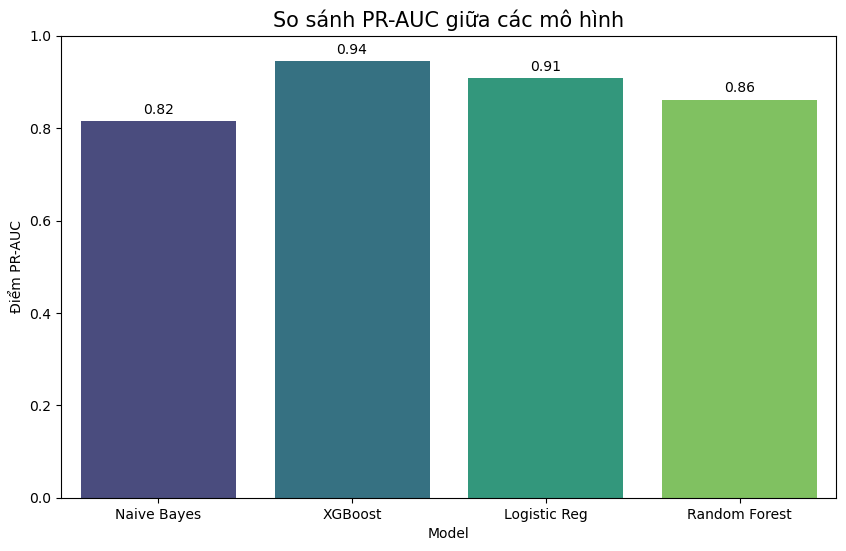

In [111]:
data = {
    'Model': ['Naive Bayes', 'XGBoost', 'Logistic Reg', 'Random Forest'],
    'PR-AUC': [0.8152, 0.9446, 0.9086, 0.8619 ]
}

df = pd.DataFrame(data)

# 2. Vẽ biểu đồ cột (Bar Chart)
plt.figure(figsize=(10, 6))
# Dùng palette màu xanh dần để đẹp mắt
ax = sns.barplot(x='Model', y='PR-AUC', data=df, palette='viridis')

# 3. Thêm số liệu lên đầu cột cho dễ nhìn
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f', padding=3)

plt.title('So sánh PR-AUC giữa các mô hình', fontsize=15)
plt.ylim(0, 1) # Giới hạn trục Y từ 0 đến 1
plt.ylabel('Điểm PR-AUC')
plt.show()

câu 1 mô hình nào quan trong xgboost

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10880\3255067234.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Model', y='PR-AUC', data=df, palette='viridis')


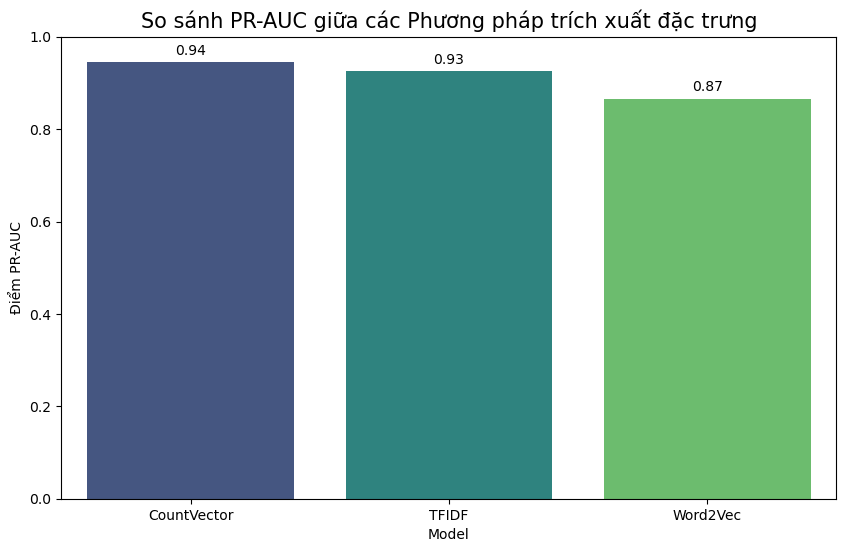

In [129]:
data = {
    'Model': ['CountVector', 'TFIDF', 'Word2Vec'],
    'PR-AUC': [0.9446,0.9263, 0.8662 ]
}

df = pd.DataFrame(data)

# 2. Vẽ biểu đồ cột (Bar Chart)
plt.figure(figsize=(10, 6))
# Dùng palette màu xanh dần để đẹp mắt
ax = sns.barplot(x='Model', y='PR-AUC', data=df, palette='viridis')

# 3. Thêm số liệu lên đầu cột cho dễ nhìn
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f', padding=3)

plt.title('So sánh PR-AUC giữa các Phương pháp trích xuất đặc trưng', fontsize=15)
plt.ylim(0, 1) # Giới hạn trục Y từ 0 đến 1
plt.ylabel('Điểm PR-AUC')
plt.show()

câu 5 

feature nào quan trong với mô hình nhất ?

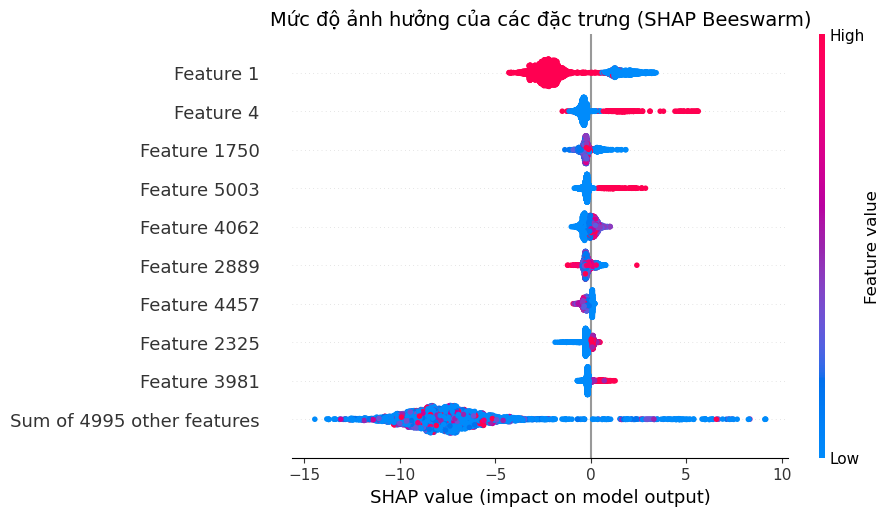

In [130]:
shapBeewarm(model_xgb2,x_testc)

<Figure size 1200x800 with 0 Axes>

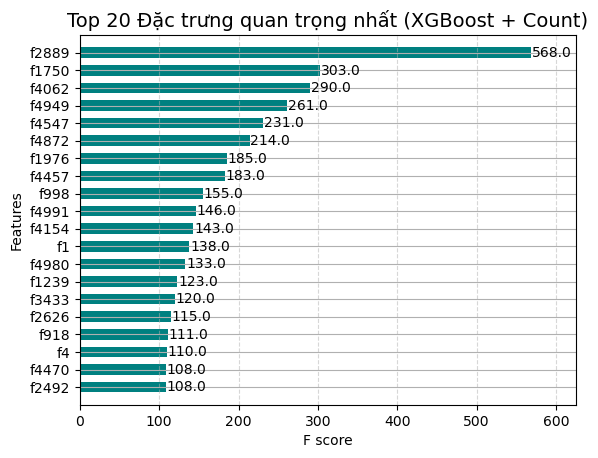

In [131]:
from xgboost import plot_importance
plt.figure(figsize=(12, 8))
plot_importance(model_xgb2, 
                max_num_features=20,     # Top 20 từ quan trọng nhất
                importance_type='weight', # Đếm số lần từ được dùng để chia nhánh
                height=0.6,
                color='teal')
plt.title('Top 20 Đặc trưng quan trọng nhất (XGBoost + Count)', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

In [132]:
pre = joblib.load(r'D:\PYTHON\data_mining\fraud-detection-post\models\Preprocess_tfidf_pipeline.pkl')
ct = pre['preprocessor']
feature_list = []
print("--- ĐANG QUÉT CẤU TRÚC BÊN TRONG ---")
# Duyệt qua từng nhánh xử lý bên trong ColumnTransformer
for name, transformer, columns in ct.transformers_:
    print(f"Đang kiểm tra nhánh: '{name}'...")
    
    try:
        # Trường hợp 1: Nhánh này là một Pipeline con (Ví dụ: cat_pipeline)
        if hasattr(transformer, 'steps'):
            # Lấy bước cuối cùng của nhánh này (thường là OneHotEncoder)
            # để né bước 'cleaner' ở đầu gây lỗi
            names = transformer[-1].get_feature_names_out()
            feature_list.extend(names)
            print(f" -> ✅ Đã lấy được {len(names)} features.")
            
        # Trường hợp 2: Nhánh này là Transformer đơn lẻ
        elif hasattr(transformer, 'get_feature_names_out'):
            names = transformer.get_feature_names_out()
            feature_list.extend(names)
            print(f" -> ✅ Đã lấy được {len(names)} features.")
            
        else:
            print(" -> ⚠️ Bỏ qua (Không hỗ trợ lấy tên)")
            
    except Exception as e:
        print(f" -> ❌ Lỗi ở nhánh này: {e}")

print("-" * 30)
print(f"Tổng số features thu thập được: {len(feature_list)}")

# IN RA KẾT QUẢ CUỐI CÙNG
if len(feature_list) > 2889:
    print(f"\n😈 THỦ PHẠM Feature 2889 LÀ: {feature_list[2889]}")
else:
    print(f"\n⚠️ Vẫn chưa đủ số lượng feature (Tìm được {len(feature_list)}, cần > 2889).")
    print("Có thể feature này sinh ra từ bước 'engineer' ở đầu mà ta đã bỏ qua.")
    

--- ĐANG QUÉT CẤU TRÚC BÊN TRONG ---
Đang kiểm tra nhánh: 'num'...
 -> ✅ Đã lấy được 3 features.
Đang kiểm tra nhánh: 'text'...
 -> ✅ Đã lấy được 5000 features.
Đang kiểm tra nhánh: 'flags'...
 -> ✅ Đã lấy được 1 features.
Đang kiểm tra nhánh: 'remainder'...
 -> ⚠️ Bỏ qua (Không hỗ trợ lấy tên)
------------------------------
Tổng số features thu thập được: 5004

😈 THỦ PHẠM Feature 2889 LÀ: miss


feature miss quan trọng nhất nhưng nó là từ thay thế missing trong các cột text bị thiếu có khả năng là đâu mà một feature rất quan trọng để mô hình đưa ra dự đoán giả mạo -> những trang tuyển dụng nào có text là rỗng thì sẽ bị nghi ngờ là giả mạo tuyển dụng -> từ đây ta cần trả lời thêm câu hỏi là tại sao những trang giả mạo tuyển dụng lại để trống các cột quyền lợi, thông tin công ti và mô tả?